We will try to modelize the trafic on the instagram posts. 


In [186]:
import pandas as pd
import math as m 
import matplotlib.pyplot as plt
import numpy as np

In [187]:
activity_posts = pd.read_csv("instagram_posts_0911_1111.csv", delimiter=',')
# print(activity_posts["likes"])
# print(activity_posts)

Now we try to implement the flux 

In [188]:
taille_data = 24
view = [0 for i in range(taille_data)]
like = [0 for i in range(taille_data)]
comment = [0 for i in range(taille_data)]
repost = [0 for i in range(taille_data)]

Then we add in each category the interactions which occur.

In [189]:
date = activity_posts["date"]
time = activity_posts["time"]
half_day = activity_posts["half_day"]
view_csv = activity_posts["views"]
like_csv = activity_posts["likes"]
comment_csv = activity_posts["comments"]
repost_csv = activity_posts["reposts"]


In [190]:
for i in range(len(date)):
    if date[i] == "11/11/2017":
        if half_day[i] == "am":
            index = m.floor(int(time[i][:2]))
            view[index] += view_csv[i]
            like[index] += like_csv[i]
            comment[index] += comment_csv[i]
            repost[index] += repost_csv[i]
        else:
            index = m.floor(int(time[i][:2])) + 11
            view[index] += view_csv[i]
            like[index] += like_csv[i]
            comment[index] += comment_csv[i]
            repost[index] += repost_csv[i]


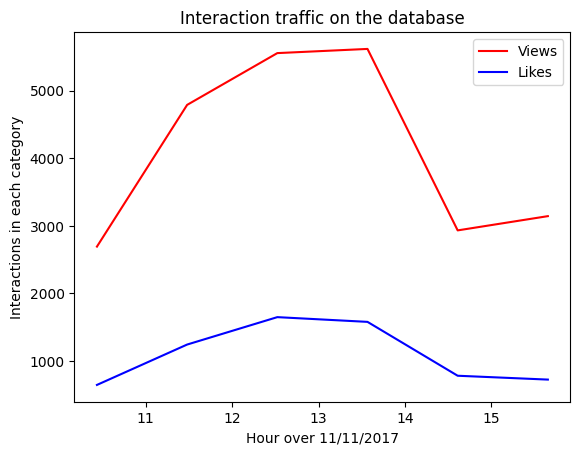

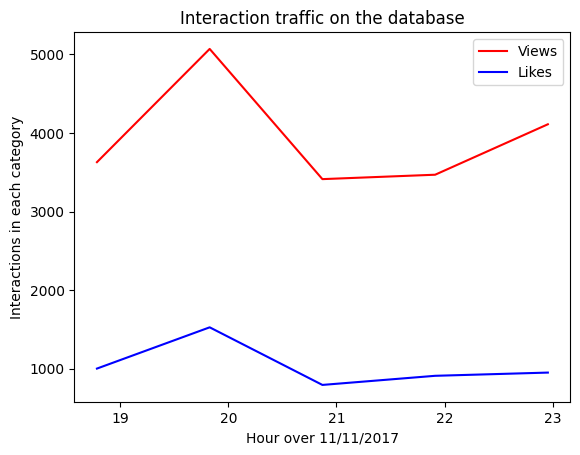

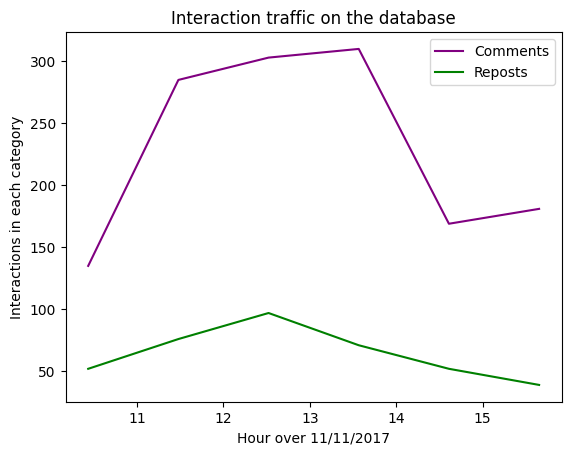

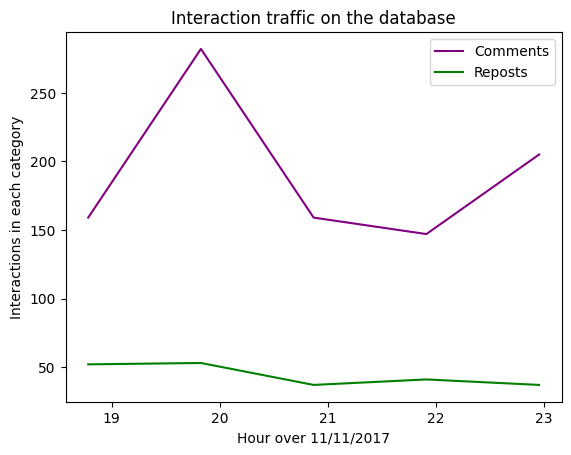

In [191]:
t = np.linspace(0,24,taille_data)
plt.figure(1)
plt.title("Interaction traffic on the database")
plt.plot(t[10:16],view[10:16],'r-',label = "Views")
plt.plot(t[10:16],like[10:16], 'b-',label = "Likes")
plt.xlabel("Hour over 11/11/2017")
plt.ylabel("Interactions in each category")
plt.legend()
plt.figure(2)
plt.title("Interaction traffic on the database")
plt.plot(t[18:23],view[18:23],'r-',label = "Views")
plt.plot(t[18:23],like[18:23], 'b-',label = "Likes")
plt.xlabel("Hour over 11/11/2017")
plt.ylabel("Interactions in each category")
plt.legend()
plt.figure(3)
plt.title("Interaction traffic on the database")
plt.plot(t[10:16],comment[10:16], color = "purple", label = "Comments")
plt.plot(t[10:16],repost[10:16], color = "green", label = "Reposts")
plt.xlabel("Hour over 11/11/2017")
plt.ylabel("Interactions in each category")
plt.legend()
plt.figure(4)
plt.title("Interaction traffic on the database")
plt.plot(t[18:23],comment[18:23], color = "purple", label = "Comments")
plt.plot(t[18:23],repost[18:23], color = "green", label = "Reposts")
plt.xlabel("Hour over 11/11/2017")
plt.ylabel("Interactions in each category")
plt.legend()
plt.show()

Now we assess the correlation between the sex of the user and the number of views on its post.

In [193]:
insta_accounts = pd.read_csv("instagram_accounts.csv")

insta_id_account = insta_accounts['id_user']
insta_sex = insta_accounts['sex']
insta_id_post = activity_posts['id_user']
insta_view_post = activity_posts['views']

sum_view_w = 0
sum_posts_w = 0
sum_view_m = 0
sum_posts_m = 0

for i in range(len(insta_id_account)):
    for j in range(len(insta_view_post)):
        if insta_id_account[i] == insta_id_post[j]:
            if insta_sex[i] == "female":
                sum_view_w += insta_view_post[j]
                sum_posts_w += 1
            else :
                sum_view_m += insta_view_post[j]
                sum_posts_m += 1

# print(sum_view_w/sum_posts_w)
# print(sum_posts_w)
# print(sum_view_m/sum_posts_m)
# print(sum_posts_m)


Now we study the correlation between age and the amonts of view per post 

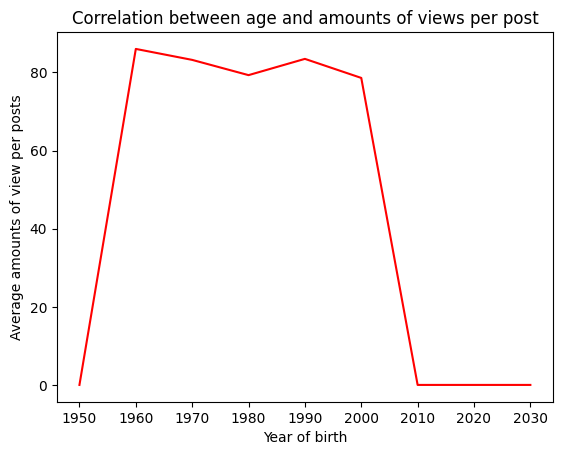

In [195]:
insta_id_account = insta_accounts['id_user']
insta_birthday = insta_accounts['birth_date']
insta_id_post = activity_posts['id_user']
insta_view_post = activity_posts['views']


age = [0 for i in range(10)]
occurence = [0 for i in range(10)]

for i in range(len(insta_id_account)):
    for j in range(len(insta_view_post)):
        if insta_id_account[i] == insta_id_post[j]:
            age[int(insta_birthday[i][6:])//10] += insta_view_post[j]
            occurence[int(insta_birthday[i][6:])//10] += 1

rapport = [0 for i in range(10)]
for i in range(len(rapport)):
    if occurence[i]!= 0:
        rapport[i] = age[i]/occurence[i]

rapport = rapport[5:] + rapport[:4]
t = [1950 + 10*i for i in range(len(rapport))]
plt.plot(t,rapport,color = "red")
plt.xlabel("Year of birth")
plt.ylabel("Average amounts of view per posts")
plt.title("Correlation between age and amounts of views per post")
plt.show()



Now we assess if there is a correlation between the amount of views and the department of origin.

["('82', 'Tarn-et-Garonne')", "('61', 'Orne')", "('42', 'Loire')", "('74', 'Haute-Savoie')", "('92', 'Hauts-de-Seine')", "('88', 'Vosges')", "('15', 'Cantal')", "('75', 'Paris')", "('43', 'Haute-Loire')", '(\'22\', "Côtes-d\'Armor")', "('36', 'Indre')", "('28', 'Eure-et-Loir')", "('91', 'Essonne')", "('55', 'Meuse')", "('974', 'La Réunion')", "('976', 'Mayotte')", "('54', 'Meurthe-et-Moselle')", "('76', 'Seine-Maritime')", '(\'21\', "Côte-d\'Or")', "('49', 'Maine-et-Loire')", "('10', 'Aube')", "('31', 'Haute-Garonne')", "('52', 'Haute-Marne')", "('50', 'Manche')", "('35', 'Ille-et-Vilaine')", "('72', 'Sarthe')", "('972', 'Martinique')", "('45', 'Loiret')", "('2B', 'Haute-Corse')", "('53', 'Mayenne')", "('71', 'Saône-et-Loire')", "('77', 'Seine-et-Marne')", "('78', 'Yvelines')", "('86', 'Vienne')", "('60', 'Oise')", "('84', 'Vaucluse')", "('29', 'Finistère')", "('85', 'Vendée')", "('34', 'Hérault')", "('973', 'Guyane')", "('14', 'Calvados')", "('58', 'Nièvre')", "('89', 'Yonne')", "('83

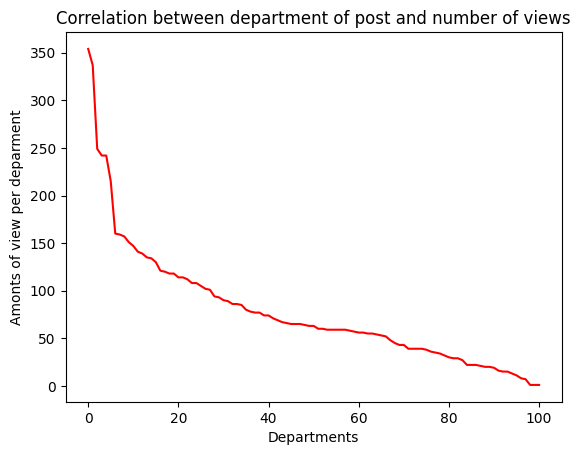

In [196]:
insta_id_account = insta_accounts['id_user']
insta_department = insta_accounts['department']
insta_id_post = activity_posts['id_user']
insta_view_post = activity_posts['views']


department = {}
occurence_d = {}

for i in range(len(insta_id_account)):
    for j in range(len(insta_view_post)):
        if insta_id_account[i] == insta_id_post[j]:
            if insta_department[i][1] not in department:
                department[insta_department[i]] = insta_view_post[j]
                occurence_d[insta_department[i]] = 1
            else :
                department[insta_department[i]] += insta_view_post[j]
                occurence_d[insta_department[i]] += 1

# graphique = department.values()
# print(department)
# print(graphique)
# plt.plot(graphique)
# plt.show()
maxi = 0 
deps = []
current = 0
for i in range(len(department.keys())):
    for elem in department.keys():
        if department[elem] > maxi and elem not in deps:
            maxi = department[elem]
            current = elem 
    deps.append(current)
    maxi = 0 

values = [department[elem] for elem in deps]
print(deps)
print(values)
plt.plot(values,color = "red")
plt.ylabel("Amonts of view per deparment")
plt.xlabel("Departments")
plt.title("Correlation between department of post and number of views")
plt.show()